In [8]:
from flask import Flask, render_template, request, redirect, url_for, session, jsonify
from pymongo import MongoClient

client = MongoClient('mongodb://localhost:27017/')
db = client['airportDB']
users = db['users']
flights = db["flights"]
bookings = db["bookings"]
discount = db["discount"]

In [9]:
query = flights.aggregate([{'$project': 
                            {'_id': 0,
                             'fromLocation': '$flight_details.fromLocation',
                             'toLocation': '$flight_details.toLocation'
                            }}])

from_locations_dict = {}

for res in query:
    key = (res['fromLocation'])
    from_locations_dict[key] = from_locations_dict.get(key, 0) + 1
    
from_locations_dict = dict(sorted(from_locations_dict.items(), key=lambda item: item[1], reverse=True))

from_locations_dict


{'Chicago': 10,
 'London': 9,
 'Paris': 8,
 'Dubai': 7,
 'Tokyo': 7,
 'Amsterdam': 5,
 'Frankfurt': 5,
 'Istanbul': 4,
 'Sydney': 4,
 'New York': 4,
 'Atlanta': 4,
 'Doha': 4,
 'Toronto': 3,
 'Hong Kong': 3,
 'Abu Dhabi': 3,
 'Mumbai': 2,
 'Dallas': 2,
 'Dublin': 2,
 'Rome': 2,
 'Moscow': 2,
 'Melbourne': 1,
 'Miami': 1,
 'Houston': 1,
 'Munich': 1,
 'Los Angeles': 1,
 'Seoul': 1,
 'Johannesburg': 1,
 'Berlin': 1,
 'Zurich': 1,
 'Delhi': 1}

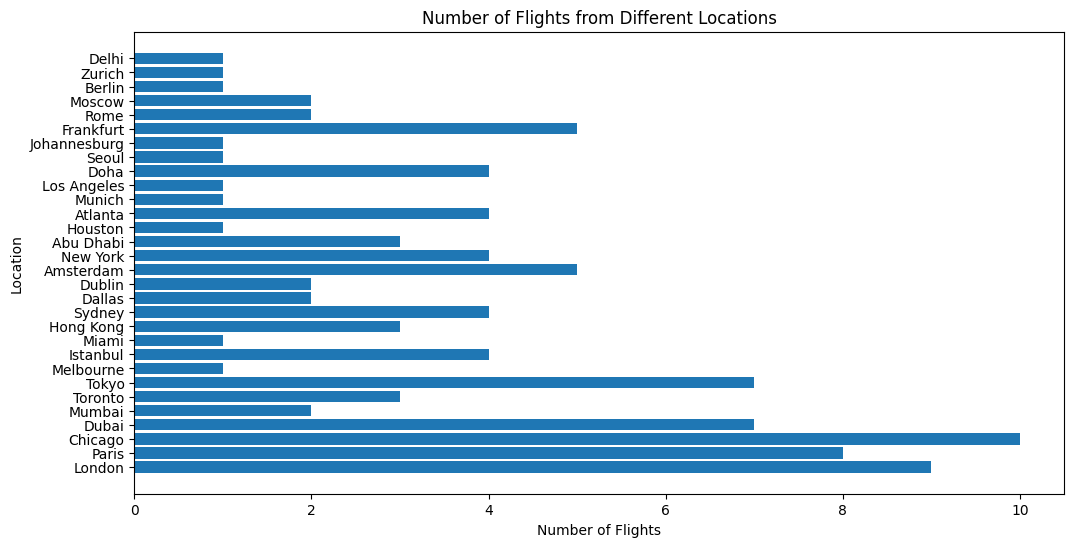

In [10]:
import matplotlib.pyplot as plt

# Input data
from_locations_dict = {'London': 9, 'Paris': 8, 'Chicago': 10, 'Dubai': 7, 'Mumbai': 2, 'Toronto': 3, 'Tokyo': 7, 'Melbourne': 1, 'Istanbul': 4, 'Miami': 1, 'Hong Kong': 3, 'Sydney': 4, 'Dallas': 2, 'Dublin': 2, 'Amsterdam': 5, 'New York': 4, 'Abu Dhabi': 3, 'Houston': 1, 'Atlanta': 4, 'Munich': 1, 'Los Angeles': 1, 'Doha': 4, 'Seoul': 1, 'Johannesburg': 1, 'Frankfurt': 5, 'Rome': 2, 'Moscow': 2, 'Berlin': 1, 'Zurich': 1, 'Delhi': 1}

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Create a horizontal bar chart
ax.barh(list(from_locations_dict.keys()), list(from_locations_dict.values()))

# Add title and labels
ax.set_title('Number of Flights from Different Locations')
ax.set_xlabel('Number of Flights')
ax.set_ylabel('Location')
plt.savefig('fromLocation.png')
# Display the plot
plt.show()


In [11]:
query = flights.aggregate([{'$project': 
                            {'_id': 0,
                             'fromLocation': '$flight_details.fromLocation',
                             'toLocation': '$flight_details.toLocation'
                            }}])

to_locations_dict = {}

for res in query:
    key = (res['toLocation'])
    to_locations_dict[key] = to_locations_dict.get(key, 0) + 1
    
to_locations_dict = dict(sorted(to_locations_dict.items(), key=lambda item: item[1], reverse=True))

print(to_locations_dict)


{'London': 11, 'New York': 10, 'Tokyo': 10, 'Sydney': 7, 'Los Angeles': 7, 'Mexico City': 6, 'New Delhi': 5, 'Rio de Janeiro': 4, 'San Francisco': 4, 'Dubai': 4, 'Shanghai': 3, 'Beijing': 3, 'Honolulu': 2, 'Auckland': 2, 'Chicago': 2, 'Toronto': 2, 'Barcelona': 2, 'Miami': 2, 'Melbourne': 2, 'Vancouver': 1, 'Seoul': 1, 'Amsterdam': 1, 'Delhi': 1, 'Cape Town': 1, 'Buenos Aires': 1, 'Paris': 1, 'Bangkok': 1, 'São Paulo': 1, 'Houston': 1, 'Singapore': 1, 'Seattle': 1}


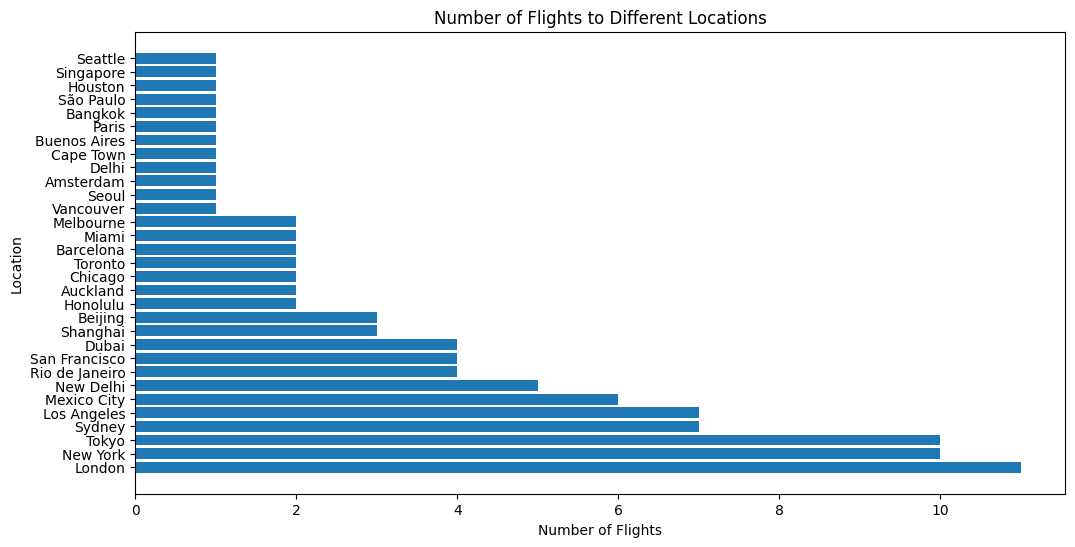

In [12]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Create a horizontal bar chart
ax.barh(list(to_locations_dict.keys()), list(to_locations_dict.values()))

# Add title and labels
ax.set_title('Number of Flights to Different Locations')
ax.set_xlabel('Number of Flights')
ax.set_ylabel('Location')
plt.savefig('toLocation.png')
# Display the plot
plt.show()


In [16]:
query = flights.aggregate([{'$project': 
                            {'_id': 0,
                             'fromLocation': '$flight_details.fromLocation',
                             'toLocation': '$flight_details.toLocation'
                            }}])

source_destination = []

for res in query:
    source_destination.append((res['fromLocation'],res['toLocation']))
    
source_destination
    

[('London', 'New York'),
 ('Paris', 'Tokyo'),
 ('Chicago', 'Sydney'),
 ('Dubai', 'Los Angeles'),
 ('Mumbai', 'London'),
 ('Chicago', 'London'),
 ('Toronto', 'Mexico City'),
 ('Tokyo', 'Honolulu'),
 ('Melbourne', 'Auckland'),
 ('Istanbul', 'New Delhi'),
 ('Miami', 'London'),
 ('London', 'New York'),
 ('Paris', 'Tokyo'),
 ('Dubai', 'New Delhi'),
 ('Hong Kong', 'Los Angeles'),
 ('Chicago', 'London'),
 ('London', 'Sydney'),
 ('Paris', 'Tokyo'),
 ('Sydney', 'New York'),
 ('Dubai', 'Los Angeles'),
 ('Dallas', 'London'),
 ('Paris', 'New York'),
 ('Istanbul', 'Chicago'),
 ('Tokyo', 'Los Angeles'),
 ('Sydney', 'Vancouver'),
 ('Dubai', 'Toronto'),
 ('Chicago', 'London'),
 ('London', 'New York'),
 ('Dublin', 'Barcelona'),
 ('Amsterdam', 'Rio de Janeiro'),
 ('Hong Kong', 'Sydney'),
 ('Toronto', 'Mexico City'),
 ('Chicago', 'London'),
 ('London', 'New York'),
 ('Dublin', 'Barcelona'),
 ('Sydney', 'Auckland'),
 ('New York', 'Shanghai'),
 ('Abu Dhabi', 'New Delhi'),
 ('Chicago', 'London'),
 ('Houston

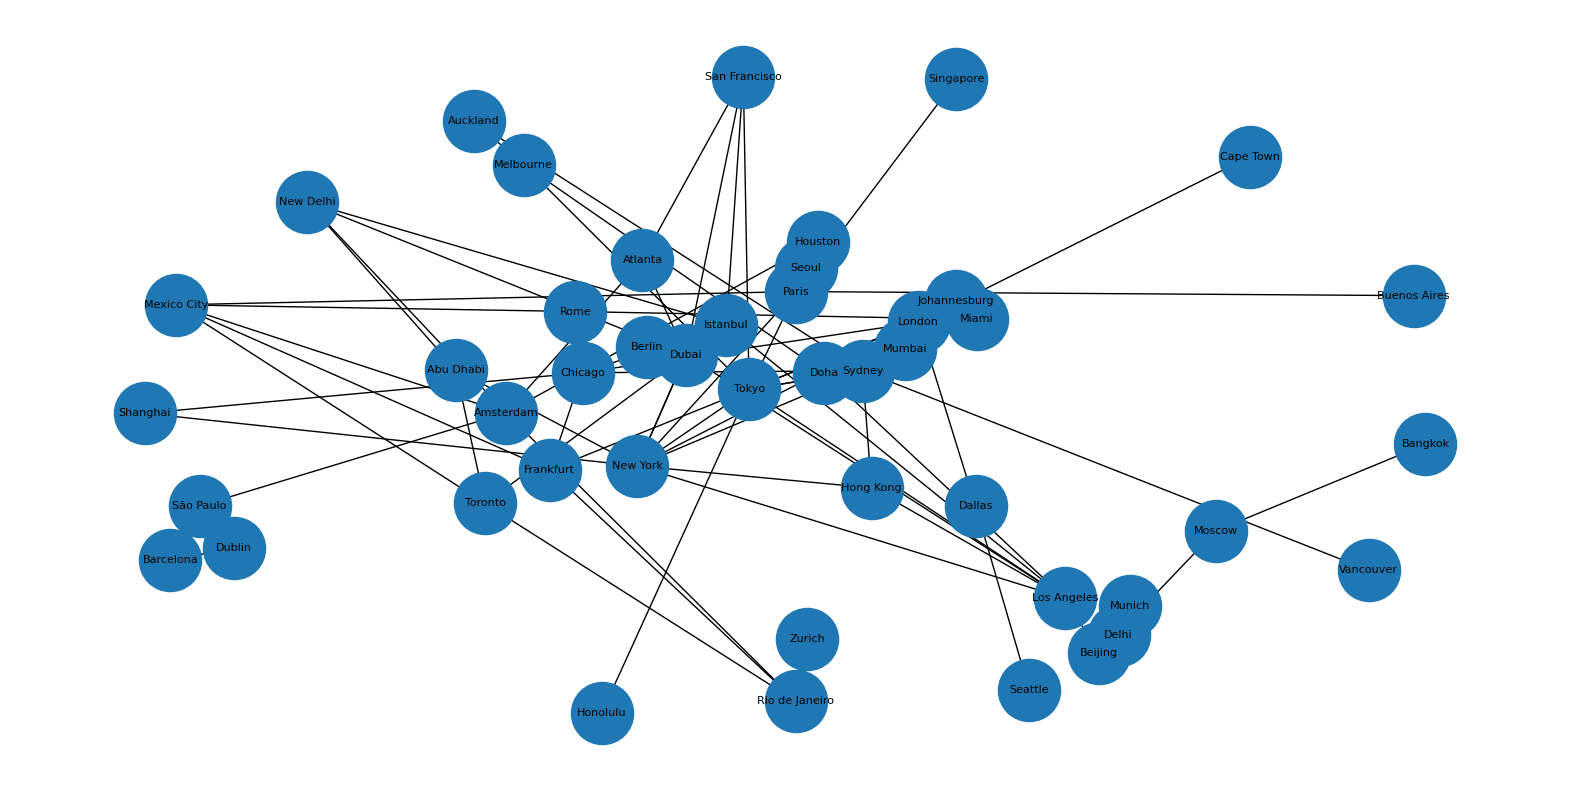

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new directed graph
G = nx.DiGraph()

# Define the edges
edges = source_destination

# Add the edges to the graph
G.add_edges_from(edges)

# Define the position of each node using a layout algorithm
pos = nx.spring_layout(G)

# Draw the nodes and edges
fig, ax = plt.subplots(figsize=(20, 10))
nx.draw_networkx_nodes(G, pos, node_size=2000)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")
plt.savefig("connected_airports.png")
# Show the graph
plt.axis("off")
plt.show()
